In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ニューラルネットワークによる手書き数字画像の分類
# Classification of Handwritten Number Images Using Neural Network
MNISTの0から9までの手書き数字の画像を分類する
Classify images of handwritten numbers from 0 to 9 on MNIST

## 画像データの読み込み


In [2]:
%matplotlib inline
!pip install japanize-matplotlib

import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import japanize_matplotlib


(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4282cd54b1847adbe2aa4bb3e5cc2b606b0d7582a957309175791ba01649bf61
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


画像の枚数と画素数を確認する

In [3]:
print("訓練用画像の枚数と画素数")
print(x_train.shape)

print()

print("テスト用画像の枚数と画素数")
print(x_test.shape)


訓練用画像の枚数と画素数
(60000, 28, 28)

テスト用画像の枚数と画素数
(10000, 28, 28)


テスト用画像の1枚目の多次元配列を表示してみる

In [ ]:
# 途中で改行されないように、一行に表示できる文字数を200文字に変更
np.set_printoptions(linewidth=200)


print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

## 訓練用画像の表示

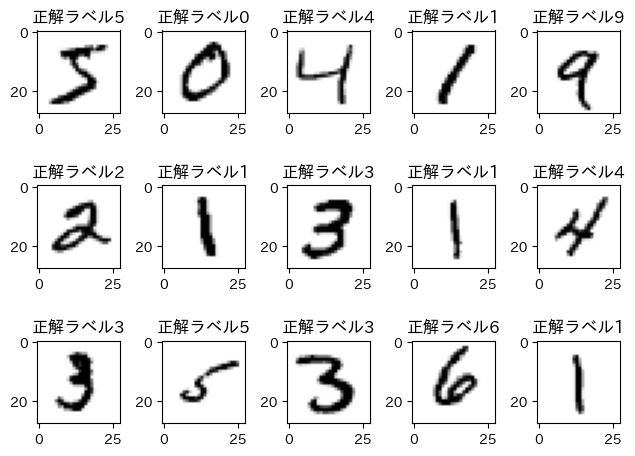

In [ ]:
fig = plt.figure()


for i in range(0,15):

  ax = fig.add_subplot(3, 5, i+1)

  ax.set_title("正解ラベル" + str(y_train[i]))

  ax.imshow(x_train[i], cmap='Greys')

fig.tight_layout()

plt.show()

## 画像の正規化
画素値が0から1の範囲に収まるように前処理を行う

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

カテゴリ変数をone-hotエンコーディングする

In [ ]:
from tensorflow.keras.utils import to_categorical

print("エンコーディング前のラベルの一部を表示")
print(y_train[0:4])

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print()
print("エンコーディング後のラベルの一部を表示")
print(y_train[0:4])

エンコーディング前のラベルの一部を表示
[5 0 4 1]

エンコーディング後のラベルの一部を表示
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## モデルの作成
## Create model

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

## モデルへニューロンの層を追加

In [ ]:
# 追加する層をインポートしておく
from tensorflow.keras.layers import Dense, Dropout, Flatten


# Flatten層の追加
# 28画素×28画素の画像を1次元配列に変換する

model.add(Flatten(input_shape=(28,28)))

# 中間層(隠れ層)の追加
model.add(Dense(units=128, activation='relu'))

# 出力層の追加
model.add(Dense(units=10, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## モデルのコンパイル
## Model Compilation

In [ ]:
model.compile(optimizer ='adam' ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 学習の実行
## Performing Learning

In [ ]:
epochs = 10

results = model.fit(x_train,y_train, epochs = epochs , \
                    validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8819 - loss: 0.4277 - val_accuracy: 0.9571 - val_loss: 0.1439
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9647 - loss: 0.1209 - val_accuracy: 0.9698 - val_loss: 0.1017
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9761 - loss: 0.0798 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9829 - loss: 0.0561 - val_accuracy: 0.9764 - val_loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9763 - val_loss: 0.0783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9779 - val_loss: 0.0749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9770 - val_loss: 0.0775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9927 - loss: 0.02

## 学習履歴の可視化
## Visualization learning history

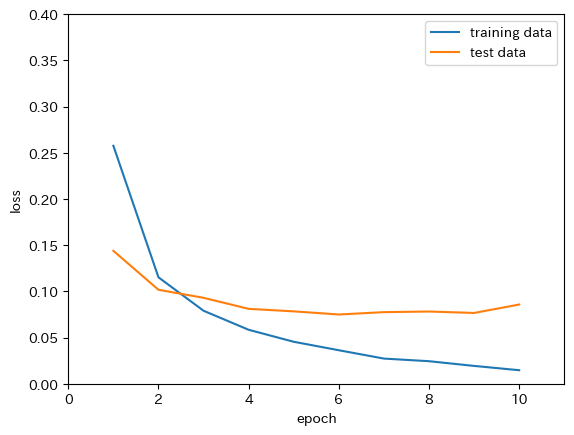

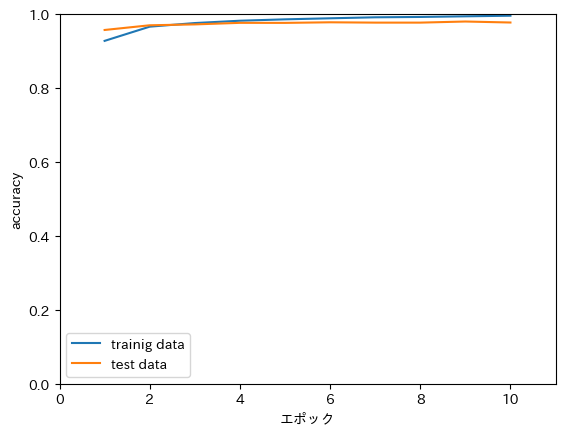

In [ ]:

# 学習のエポック数のリストを生成
epo = range(1, epochs+1)


#------------------------------
# 損失関数のグラフを表示
#------------------------------

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("epoch")
ax.set_ylabel("loss")


ax.set_xlim(0,epochs + 1)
ax.set_ylim(0,0.4)



# 訓練用データでの損失関数のグラフ
ax.plot(epo, results.history["loss"], label="training data")
# テスト用データでの損失関数のグラフ
ax.plot(epo, results.history["val_loss"], label="test data")

ax.legend()

plt.show()


#------------------------------
# 正解率のグラフを表示
#------------------------------


fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("エポック")
ax.set_ylabel("accuracy")

ax.set_xlim(0,epochs + 1)
ax.set_ylim(0,1)


# 訓練用データでの正解率のグラフ
ax.plot(epo, results.history["accuracy"], label="trainig data")
# テスト用データでの正解率のグラフ
ax.plot(epo, results.history["val_accuracy"], label="test data")

ax.legend()

plt.show()




## 学習済みモデルを用いた予測
## Prediction using learned models

In [ ]:
# テストデータに対する予測
y_pred = model.predict(x_test)

# 予測値の最初のいくつかを表示
print("予測結果の一部を表示")
print(y_pred[0:4])

print()

# 最も確率が高いラベルを選ぶ
predicted_label = np.argmax(y_pred, axis=1)
print("予測したラベルの一部を表示")
print(predicted_label[0:4])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
予測結果の一部を表示
[[2.2680158e-10 7.0365859e-13 5.1894538e-09 5.1940901e-08 7.2540511e-14 6.7917846e-12 1.2271734e-19 9.9999982e-01 3.7419301e-10 1.6627527e-07]
 [1.0541867e-13 1.7201573e-07 9.9999982e-01 1.3307297e-09 2.2258228e-19 8.9124480e-10 3.1068910e-12 3.5719051e-20 1.1350813e-09 3.2849526e-18]
 [1.4607466e-11 9.9995369e-01 1.0320646e-06 4.4614122e-08 4.5823860e-08 2.7489464e-09 2.7595790e-09 1.4351834e-05 3.0730513e-05 1.6439586e-09]
 [9.9999958e-01 1.5215184e-13 1.7822438e-07 2.1171063e-13 2.6944807e-10 2.7988897e-10 7.6203946e-11 2.7663887e-07 1.2549265e-15 3.6986375e-10]]

予測したラベルの一部を表示
[7 2 1 0]


## 混同行列の表示
## Confusion matrix

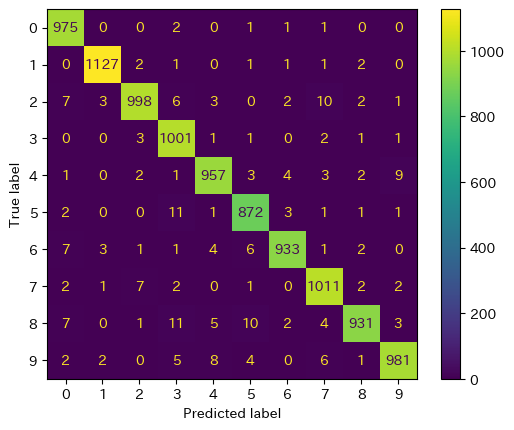

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# テストデータの正解ラベル
y_test_label = np.argmax(y_test, axis=1)



# 混同行列の計算
cm = confusion_matrix(y_test_label, predicted_label)

# 混同行列のヒートマップを作成
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()